In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data file.csv')

# Data Summarization

In [ ]:
data.head()

In [3]:
#drop the index column from csv file
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.info()

    We have to convert features with object data types  into int or float.

In [ ]:
data.describe()

Observations :
    1. No null values are present.
    2. Mean > Median in almost all columns except label column. Hence most of the data are right skewed.
    3. Label column is left skewed.
    4. There is a huge gap betweem 75% and max values, hence outliers are widely present. 

In [ ]:
data.columns

In [4]:
#Since label column is our target variable, I would like to keep the column at the end.

data = data[[col for col in data if col not in ['label']] + ['label']]

# Data Visualization

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull())

     No null values are present.

In [ ]:
data['amnt_loans90'].plot(kind='hist').set(xlim=(0,200))

In [ ]:
fig,ax = plt.subplots(figsize=(3,3))
ax.boxplot(data['aon']) 
plt.title("Age of Cellular Network in Days")

     We can see that there are outliers which lies beyond 50000. We can drop such data.

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(10,5))
data['fr_ma_rech90'].plot(kind='hist',color='Brown')
plt.title("Frequency of Rechairge in Main Account in last 90 days",fontsize=12)
plt.xlabel("Frequency of main account recharge")
plt.ylabel("Frequency of occurence")


In [ ]:
plt.figure(figsize=(5,5))
g = sns.FacetGrid(data, col = "label")
plt.title("Average Payback time by defaulters and non-defaulters in last 90 days")
g.map(plt.hist,"amnt_loans90)

In [ ]:
sns.regplot(x='cnt_loans30',y='payback30',data=data)

In [ ]:
sns.lmplot(x='cnt_loans30',y='payback30',data=data,hue='label')

In [ ]:
sns.scatterplot(data.index,data['daily_decr30'],hue=data['label'])

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)
sns.lineplot(x=data.index,y=data['payback30'],data=data)
plt.xlabel("Index")

In [ ]:
#How many classes are present under target variable
sns.set(style = 'darkgrid')
ax = sns.countplot(data['label'])
plt.title("Classes under Target Variable")


Observation : 
    0 - indicates the count for defaulter, i.e who has not paid the loan amont, which is approaximately 25000.
    1 - indicates the count for non-defaulters, i.e who has paid the loan amount, which is near to 1,80,000.
        
    We can see that our data set is imbalanced.

# Data Manipulation

In [ ]:
data['pcircle'].value_counts()

    Since we have only one value for all the data, we can drop this column.

In [ ]:
#The loan amount can be either Rs. 6 or Rs. 12, Let us check if there are any values other than 6 or 12.
data[(data['maxamnt_loans30'] == 6 ) | (data['maxamnt_loans30'] == 12 )]

    We need to remove all the rows other than which has amount of rs 6 and 12,
    as they are only two options given in the use case.

In [5]:
data = data[(data['maxamnt_loans30'] == 6 ) | (data['maxamnt_loans30'] == 12 )]

In [6]:
#There is a letter I in each ID. Remove the alphabet.
data['msisdn'].replace('[A-Z]','',regex=True,inplace=True)
data['msisdn'] = data['msisdn'].astype('int64')

In [ ]:
data['fr_da_rech30'].value_counts()
#drop this column as maximum values are 0s 

In [ ]:
data['cnt_da_rech90'].value_counts()
#drop this column as maximum values are 0s  

In [ ]:
data['cnt_da_rech30'].value_counts()
#drop this column as  maximum values are 0s 

In [ ]:
data['fr_da_rech90'].value_counts()
#drop this column as maximum values are 0s 

In [ ]:
data['medianamnt_loans90'].value_counts()
#drop this column as maximum values are 0s 

In [ ]:
data['medianamnt_loans30'].value_counts()
#drop this as well as maximum values are 0s 

In [7]:
drop_columns = ['pcircle','pdate','fr_da_rech90','fr_da_rech30','medianamnt_loans90','medianamnt_loans30',
                'last_rech_date_da','cnt_da_rech90','cnt_da_rech30']

for each in drop_columns:
    data.drop(each,axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
data.info()

    All the following columns should be converted to integer:
        1. aon            - Age on Cellular Network in Days
        2. cnt_ma_rech90  - No of times, the main account was recharged in past 90 days.
        3. cnt_ma_rech30  - No of times, the main account was recharged in past 30 days
        4. fr_ma_rech90   - Frequency of recharge in main account in past 90 days.
        5. fr_ma_rech30   - Frequency of recharge in main account in past 30 days.
        6. cnt_loans90    - No. of loans taken in last 90 days.
        7. cnt_loans30    - No. of loans taken in last 30 days.
        8. payback30      - Average Payback time in last 30 days.
        9. payback90      - Average Payback time in last 90 days.
        10.last_rech_date_ma - Number of days till last recharge of main account.


In [8]:
columns = ['aon','cnt_ma_rech90','cnt_ma_rech30','fr_ma_rech90',
           'fr_ma_rech30','cnt_loans90','cnt_loans30','payback30','payback90','last_rech_date_ma']

for each in columns:
    data[each] = data[each].astype('int64')

In [ ]:
col = data.columns.values
plt.figure(figsize=(20,130))

for i in range(len(col)):
    plt.subplot(27,3,i+1)
    sns.distplot(data[col[i]],color='tomato')
plt.show()

In [ ]:
col = data.columns.values
plt.figure(figsize=(20,150))

for i in range(len(col)):
    plt.subplot(27,3,i+1)
    sns.boxplot(data[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

In [9]:
# calculate interquartile range

def find_outliers(columns):
    
    q25, q75 = data[columns].quantile(0.25), data[columns].quantile(0.75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower_bound = q25 - cut_off
    upper_bound = q75 + cut_off 
    outliers = data[(data[columns] > upper_bound) | (data[columns] < lower_bound)]
    if len(outliers) < 10000:
        data.drop(outliers.index,axis=0,inplace=True)
        print("Dropped ",len(outliers), "rows from original data.")

    
    print("*******************************************")
    print("Column Name : ",columns)
    print("Original Length : ", len(data[cols]))
    print("Outliers: ", len(outliers))
    print("*******************************************")


In [10]:
cols = ['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30',
        'fr_ma_rech30','sumamnt_ma_rech30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','cnt_loans30',
        'amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']


print("Original length of Data = ",data.shape)
print("------------------------------------------------------")
for each in range(len(cols)):
    find_outliers(cols[each])
    
print("------------------------------------------------------")
print("Final length of Data = ",data.shape)

Original length of Data =  (205302, 27)
------------------------------------------------------
Dropped  3559 rows from original data.
*******************************************
Column Name :  aon
Original Length :  201743
Outliers:  3559
*******************************************
*******************************************
Column Name :  daily_decr30
Original Length :  201743
Outliers:  16034
*******************************************
*******************************************
Column Name :  daily_decr90
Original Length :  201743
Outliers:  17938
*******************************************
*******************************************
Column Name :  rental30
Original Length :  201743
Outliers:  17874
*******************************************
*******************************************
Column Name :  rental90
Original Length :  201743
Outliers:  18686
*******************************************
*******************************************
Column Name :  last_rech_date_ma
Original Len

In [11]:
#Feature Selection

X = data.drop('label',axis=1)
Y = data.iloc[:,-1:]

In [ ]:
#Since dataset is imbalanced, we will use oversampling. 

In [ ]:
Y['label'].value_counts()

In [12]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, Y)

print('Original dataset shape', Y.shape)
print('Resample dataset shape', y_ros.shape)

Original dataset shape (191545, 1)
Resample dataset shape (332086, 1)


In [ ]:
x_ros.skew()

In [13]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X =pd.DataFrame(pt.fit_transform(x_ros),columns = x_ros.columns.values)

In [ ]:
X.skew()

In [14]:
Y = pd.DataFrame(y_ros)
Y

,label
0,0
1,1
2,1
3,1
4,1
...,...
332081,0
332082,0
332083,0
332084,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_rescaled = pd.DataFrame(scaler.fit_transform(X),columns = x_ros.columns.values)


In [ ]:
X_rescaled

In [16]:
from sklearn.decomposition import PCA

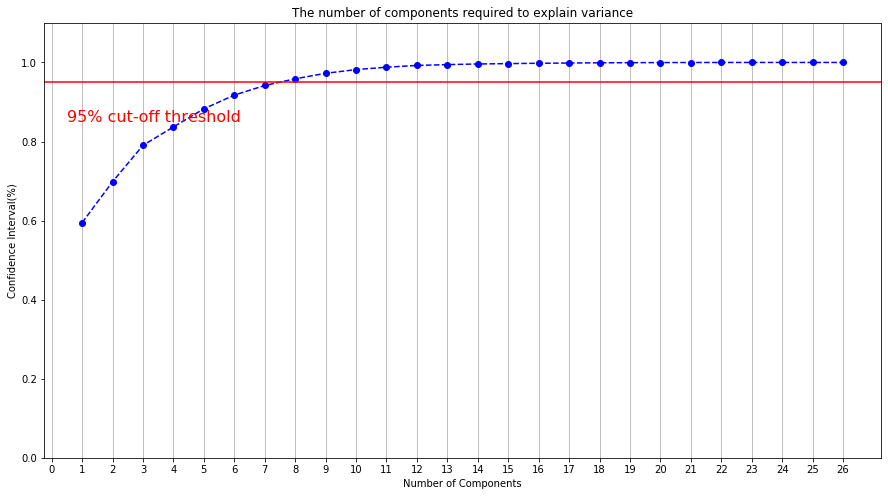

In [17]:
pca = PCA().fit(X_rescaled)

plt.rcParams["figure.figsize"] = (15,8)

fig,ax = plt.subplots()
xi = np.arange(1,27,step=1)
y=np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='b')

plt.xlabel("Number of Components")
plt.ylabel("Confidence Interval(%)")

plt.xticks(np.arange(0,27,step=1)) 
plt.title("The number of components required to explain variance")

plt.axhline(y=0.95,color='r',linestyle='-')
#plt.axvline(x=10,linestyle='--',color='green')
plt.text(0.5,0.85,'95% cut-off threshold',color='red',fontsize=16)

ax.grid(axis='x')
plt.show()

In [18]:
pca = PCA(n_components=8)
pca.fit(X_rescaled)
X = pd.DataFrame(pca.transform(X_rescaled))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state

In [20]:
model = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]


In [ ]:
model = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

for i in range(len(model)):
    state = calBestRandomStateOf(model[i])
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=state)
    model[i].fit(x_train,y_train)
    score = model[i].score(x_train,y_train)
    y_pred = model[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("*************************************************************************************")
    print("Random State : ",state)
    print("Score of ",model[i]," is : ", score)
    print("Accuracy : ",accuracy*100,"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")

In [ ]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,Y,cv=4,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

In [ ]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,Y,cv=4,scoring='f1')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

In [ ]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_dict = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

gridsearch = GridSearchCV(DecisionTreeClassifier(),param_dict,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,Y)
gridsearch.best_params_

In [ ]:
#Using the best parameters, build a svc model:

from sklearn.metrics import mean_absolute_error, mean_squared_error

dtc = DecisionTreeClassifier()
state = calBestRandomStateOf(svc)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = state )

svc.fit(x_train,y_train)
score = svc.score(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print("Score for DTC : ",score)
print("Accuracy Score for DTC : ",accuracy)
print("Classification Report : \n")
print(classification_report(y_test,y_pred))
print("Confusion Matrix :\n ")
print(confusion_matrix(y_test,y_pred))


In [ ]:
cv_score = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print("*************************************************************************************")
print("Score for ",svc," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

In [ ]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import ExtraTreesClassifier as ETC

ada = ABC(n_estimators=20,random_state=41)
gradient = GBC(n_estimators=20,random_state=162)
rfc = RFC(n_estimators=20,random_state=115)
bc = BC(n_estimators=20,random_state=42)
etc = ETC(n_estimators=20,random_state=86)

boosting_model = [ada,gradient,rfc,bc,etc]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    accuracyScore = accuracy_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("Accuracy Score : ", accuracyScore)
    print("\n")

In [ ]:
baggingClassifier = BC(n_estimators=20,random_state=162)
baggingClassifier.fit(x_train,y_train)
y_pred= baggingClassifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score for Bagging Classifier : ",round(accuracy*100,2),"%")
print("Classification Report : \n")
print(classificationReport)
print("Confusion Matrix :\n ")
print(confusionMatrix)
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
sns.heatmap(confusionMatrix)

In [ ]:
#saving the model
import joblib

joblib.dump(baggingClassifier,'baggingModel.obj')

bootingModel_from_joblib = joblib.load('baggingModel.obj')

final_output = pd.DataFrame(bootingModel_from_joblib.predict(x_test))

In [ ]:
#save final output to a csv file :
final_output.to_csv("Space_Server_Classifier_Output.csv")